In [92]:
twitter = 'topic_state_info.json'
traffic_sudo = 'traffic_sudo.json'
political_sudo = 'political_sudo.json'
criminal_sudo = 'criminal_sudo.json'
employment_sudo = 'employment_sudo.json'

In [93]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [94]:


def get_graph_info(topic, twitter_file, sudo_file,x_cols):
    STATE_NAME = ['New_South_Wales','Victoria','Queensland','South_Australia',
              'Western_Australia','Tasmania','Northern_Territory','Australian_Capital_Territory']

    plot_dict = {'state': [],'post_count':[],'user_count':[],'post_ratio':[],'user_ratio':[]}
    with open(twitter_file) as file:
        data = json.load(file)
    topic_twitter= data[topic]
#     print(topic_twitter)
    

    
    with open(sudo_file) as file:
        sudo = json.load(file)
#     print(sudo)
    
    for state in STATE_NAME:
        if state in sudo:
            sudo_info = sudo[state]
            topic_twitter_info = topic_twitter[state]
            plot_dict['state'].append(state)
            plot_dict['post_count'].append(topic_twitter_info['tweet_count'])
            plot_dict['post_ratio'].append(topic_twitter_info['tweet_ratio'])
            plot_dict['user_count'].append(topic_twitter_info['user_count'])
            plot_dict['user_ratio'].append(topic_twitter_info['user_ratio'])
            for col in x_cols:
                if col not in plot_dict:
                    plot_dict[col]= [sudo_info[col]]
                else:
                    plot_dict[col].append(sudo_info[col])
    return plot_dict

In [95]:
def plot_chart(plot_dict,bars,lines,line_label,num_label):
    
    df = pd.DataFrame.from_dict(plot_dict)

    
    # Sample data for the bar plots
#     x = df['state'].to_list()
#     x = ['NSW','VIC','QLD','SA','WA','TAS','NT','ACT']
    STATE_NAME = df['state'].to_list()

    # x = ['NSW','VIC','QLD','SA','WA','TAS','NT','ACT']
    # Mapping dictionary for shorter names
    label_mapping = {
        'New_South_Wales': 'NSW',
        'Victoria': 'VIC',
        'Queensland':'QLD',
        'South_Australia': 'SA',
        'Western_Australia':'WA',
        'Tasmania':'TAS',
        'Northern_Territory':'NT',
        'Australian_Capital_Territory': 'ACT'
    }

    # Convert x-labels to shorter names
    x = [label_mapping[label] if label in label_mapping else label for label in STATE_NAME]
    
    
    bar_width = 0.35
    
    y_bars = []
    for bar in bars:
        y_bars.append([element * 100 for element in df[bar].to_list()])
        

        
    y_lines = []
    add_num = []
    for line in lines:
        y_lines.append(df[line].to_list())
        if line in num_label:
            add_num.append(1)
        else:
            add_num.append(0)
            
        

    # Create a figure and axis objects
    fig, ax = plt.subplots()
#     "#CAAB8F"
    
    COLOUR = ["#FEBBBA","#BDD0FB","#4676B6","#FF9797","#B2827A","#B7D8BC"]
    # Plot the bar plots with different colors

    ax.bar(np.array([i for i in range(len(x))]) - bar_width/2, y_bars[0], label=bars[0], width=bar_width, color=COLOUR[0], alpha=0.7)
    ax.bar(np.array([i for i in range(len(x))]) + bar_width/2, y_bars[1], label=bars[1], width=bar_width, color=COLOUR[1], alpha=0.7)
    

    # Set the y-axis label for bars
    ax.set_ylabel("Percentage(%)")

    # Create a twin y-axis for the line plots
    ax2 = ax.twinx()

    # Plot the line plots with different colors
#     for i in range(len(y_lines)):
#         ax2.plot(x, y_lines[i], marker='o', linestyle='-', label=lines[i], color=COLOUR[i+2])
# #     ax2.plot(x, y_line2, marker='o', linestyle='-', label='Line 2', color='purple')


    

    for i in range(len(y_lines)):
        ax2.plot(x, y_lines[i], marker='o', linestyle='-', label=lines[i], color=COLOUR[i+2])
        
        if add_num[i] == 1:
            for j in range(len(x)):
                ax2.text(j, y_lines[i][j], f'{y_lines[i][j]:.0f}', ha='center', va='bottom', fontsize=9, color="#404040")


    # Set the y-axis label for lines
    ax2.set_ylabel(line_label)

    # Set labels and title
    ax.set_xlabel('State Name')
#     ax.set_title(plot_name)

    # Display legends
    
    

    ax.legend(loc='center left', bbox_to_anchor=(1.12, 0.5 + 0.04* len(y_bars)))
    ax2.legend(loc='center left', bbox_to_anchor=(1.12, 0.5 - 0.04* len(y_lines)))
   

#     Show the plot
    plt.show()


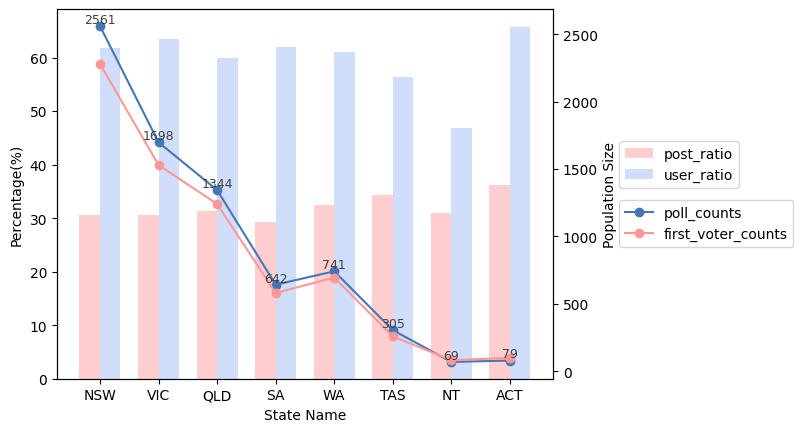

In [96]:
political_plot_dict = get_graph_info('political', twitter, political_sudo,['poll_counts','first_voter_counts'])
plot_chart(political_plot_dict,['post_ratio','user_ratio'],['poll_counts','first_voter_counts'],"Population Size",["poll_counts"])





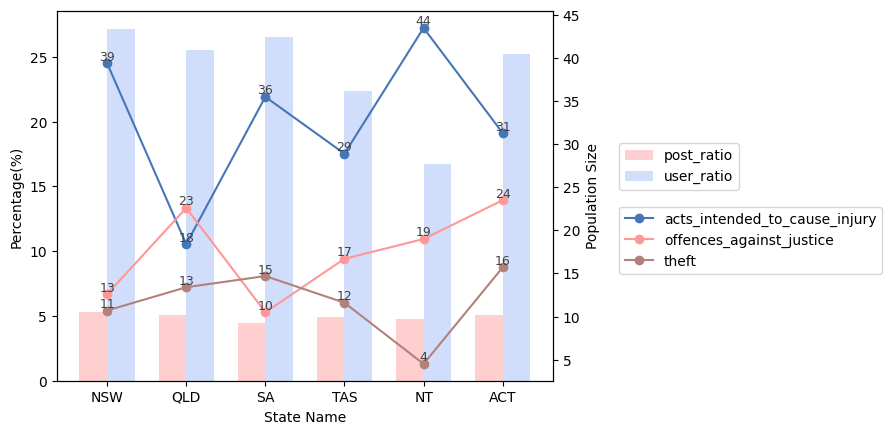

In [97]:
criminal_plot_dict = get_graph_info("criminal", twitter, criminal_sudo,["acts_intended_to_cause_injury","offences_against_justice","theft"])

plot_chart(criminal_plot_dict,['post_ratio','user_ratio'],["acts_intended_to_cause_injury","offences_against_justice","theft"],"Population Size",["acts_intended_to_cause_injury","offences_against_justice","theft"])



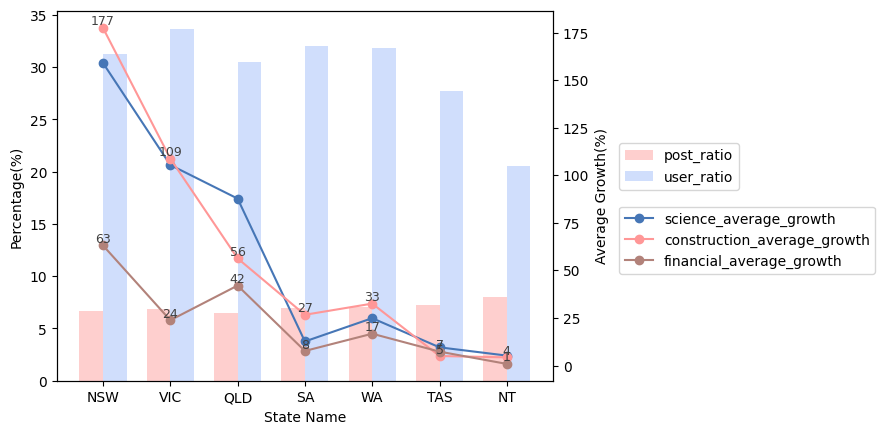

In [98]:
employment_plot_dict = get_graph_info("employment", twitter, employment_sudo,["science_average_growth","construction_average_growth","financial_average_growth","total_average_growth"])

plot_chart(employment_plot_dict,['post_ratio','user_ratio'],["science_average_growth","construction_average_growth","financial_average_growth"],"Average Growth(%)",["construction_average_growth","financial_average_growth"])


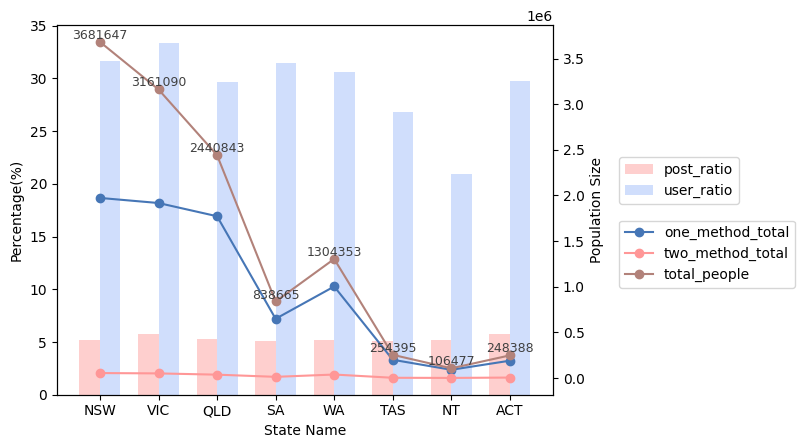

In [99]:
traffic_plot_dict = get_graph_info("traffic", twitter, traffic_sudo,["one_method_total","two_method_total","three_method_total","total_people"])

plot_chart(traffic_plot_dict,['post_ratio','user_ratio'],["one_method_total","two_method_total","total_people"],"Population Size",["total_people"])

